In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([3.74, 7.13, 4.52, 5.39, 1.99, 4.47, 2.79, 7.72, 8.27, 5.55, 9.81, 1.98, 5.58, 4.26, 6.12, 8.45, 3.88, 7.78, 6.06, 9.32])
y_train = np.array([8.18, 15.36, 10.04, 11.78, 4.98, 9.94, 6.58, 16.44, 17.54, 12.1, 20.62, 4.96, 12.16, 9.52, 13.24, 17.9, 8.76, 16.56, 13.12, 19.64])

In [4]:
def cost_function(x, y, w, b):

    m = x_train.shape[0]
    cost_sum = 0

    for i in range(m):

        f_wb = w*x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    
    total_cost = 1/(2*m) * cost_sum

    return total_cost

In [5]:
def compute_gradient(x, y, w, b):

    m = x_train.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):

        f_wb = w*x[i] + b

        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, epoch, J_hist, P_hist):

    m = x_train.shape[0]
    w = w_in
    b = b_in
    J_hist = []
    P_hist = []

    for i in range(epoch):

        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i < 100000:
            J_hist.append(cost_function(x,y,w,b))
            P_hist.append([w,b])

            if i % 1000 == 0:

                print(f"Cost: {J_hist[-1]:8.4f}, w: {w:0.3e}, b: {b:0.3e}, dj_dw: {dj_dw:0.2e}, dj_db: {dj_db:0.2e}")
    
    return w, b, J_hist, P_hist

In [7]:
w_initial = 2000
b_inital = 300
alpha = 0.01
epoch = 20000
J_hist = []
P_hist = []

w, b, J_hist, P_hist = gradient_descent(x_train, y_train, w_initial, b_inital, alpha, epoch, J_hist, P_hist)



Cost: 29618185.4176, w: 1.221e+03, b: 1.823e+02, dj_dw: 7.79e+04, dj_db: 1.18e+04
Cost:   0.0412, w: 2.122e+00, b: 1.913e-01, dj_dw: 1.52e-02, dj_db: -1.00e-01
Cost:   0.0051, w: 2.038e+00, b: 7.475e-01, dj_dw: 4.04e-03, dj_db: -2.67e-02
Cost:   0.0025, w: 2.015e+00, b: 8.954e-01, dj_dw: 1.07e-03, dj_db: -7.10e-03
Cost:   0.0023, w: 2.009e+00, b: 9.347e-01, dj_dw: 2.85e-04, dj_db: -1.89e-03
Cost:   0.0023, w: 2.008e+00, b: 9.451e-01, dj_dw: 7.58e-05, dj_db: -5.02e-04
Cost:   0.0023, w: 2.007e+00, b: 9.479e-01, dj_dw: 2.02e-05, dj_db: -1.33e-04
Cost:   0.0023, w: 2.007e+00, b: 9.486e-01, dj_dw: 5.36e-06, dj_db: -3.54e-05
Cost:   0.0023, w: 2.007e+00, b: 9.488e-01, dj_dw: 1.42e-06, dj_db: -9.42e-06
Cost:   0.0023, w: 2.007e+00, b: 9.489e-01, dj_dw: 3.79e-07, dj_db: -2.50e-06
Cost:   0.0023, w: 2.007e+00, b: 9.489e-01, dj_dw: 1.01e-07, dj_db: -6.66e-07
Cost:   0.0023, w: 2.007e+00, b: 9.489e-01, dj_dw: 2.68e-08, dj_db: -1.77e-07
Cost:   0.0023, w: 2.007e+00, b: 9.489e-01, dj_dw: 7.11e-09,

In [8]:
def compute_output(x, y, w, b):

    m = x_train.shape[0]
    f_wb = np.zeros(m)

    for i in range(m):

        f_wb[i] = w*x[i] + b
    
    return f_wb

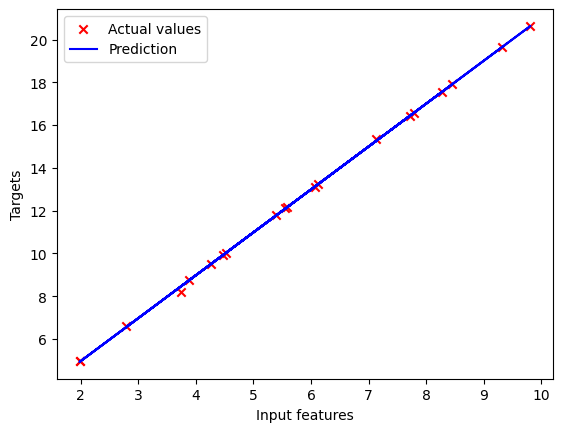

In [10]:
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual values')
plt.xlabel('Input features')
plt.ylabel('Targets')

f_wb = compute_output(x_train, y_train, w, b)

plt.plot(x_train, f_wb, c='b', label='Prediction')
plt.legend()
plt.show()
